Nolan Roth <br>
PHYS434 <br>

# Lab #3

In [46]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

plt.rcParams["figure.figsize"] = (15, 10)

## Problem 1

Plotting the normal distribution with $\mu$ = 12 and $\sigma$ = 0.4 on top of given histogram:

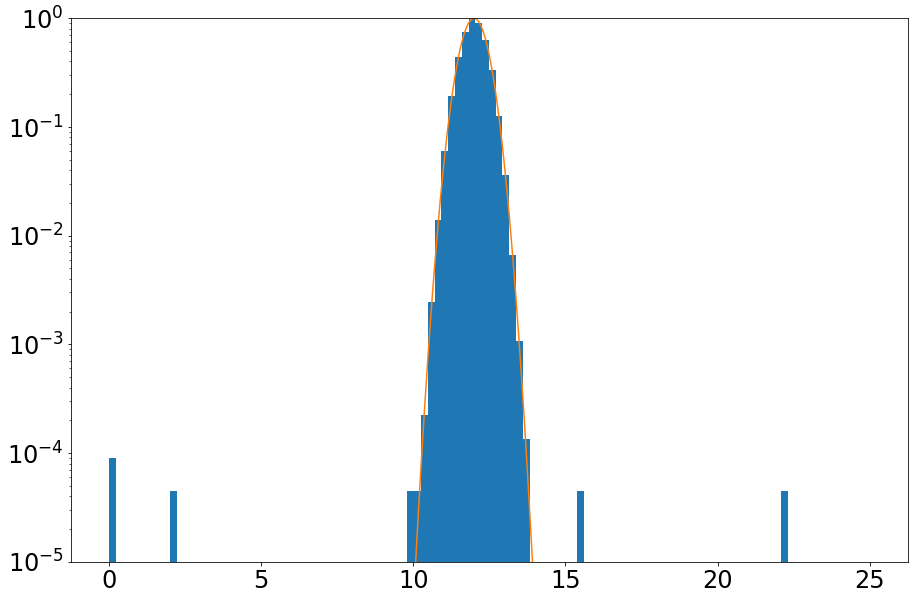

In [47]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, 12, 0.4))
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.ylim(10e-6, 1)
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

Statistical question: Which data points occur that are predicted to not occur according to the pdf that matches the distribution?


Question in math: For which values of x does y have a value much higher than y given by stats.norm.pdf(x)?

Truth table for this question:

In [20]:
t1 = QTable()
t1[' '] = ['My Test Good', 'My Test Bad']
t1['True T'] = [ 1,1 ]
t1['Bad T'] = [1 ,1 ]
t1

,True T,Bad T
str12,int64,int64
My Test Good,1,1
My Test Bad,1,1


In [21]:
# prob = 1 - stats.norm.cdf(15, 12, 0.4)
# print(prob)
# prob2 = 1 - stats.norm.cdf(17, 12, 0.4)
# print(prob - prob2)
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    if prob < 9e-6:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Removed values: ' + str(removed_values))

Removed values: [13.848920317430878, 10.0, 2.1, 0.0, 0.0, 15.6, 22.3]


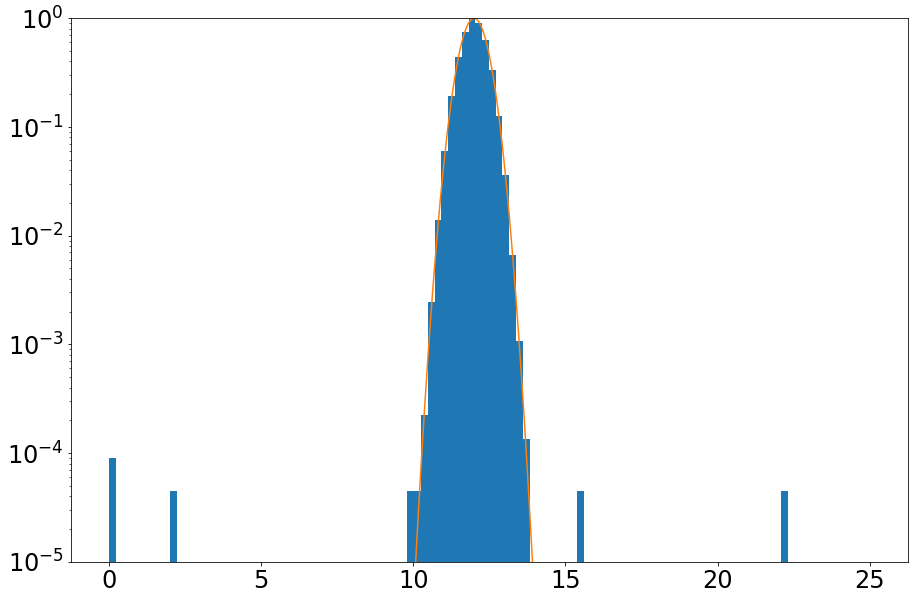

In [48]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, 12, 0.4))
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.ylim(10e-6, 1)
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

My algorithm succeeded in removing 6 of the 'bad' data points while removing 2 'good' data points as well. It failed to remove 2 of the 'bad data points. The truth table for my algorithm:

In [22]:
t1 = QTable()
t1[' '] = ['My Test Good', 'My Test Bad']
t1['True T'] = [9998, 2]
t1['Bad T'] = [2 , 6]
t1

,True T,Bad T
str12,int64,int64
My Test Good,9998,2
My Test Bad,2,6


If I raise the statistical threshold, I increase the number of omissions, both 'good' and 'bad'. I found that a good threshold is around probability = 11e-6; at this point there are usually two omitted 'good' data points and two commited 'bad' data points. It would be possible to omit all the 'bad' data points by raising the statistical threshold more, but this results in more 'good' data points being omitted as well. Committing only 'good' data points and no 'bad' data points is not possible with this data set, as there is overlap between the 'good' data points and 'bad' data points.

## Problem 2

The question in words: what values of x and y give us a distance of 5 sigma?

The question in math: 

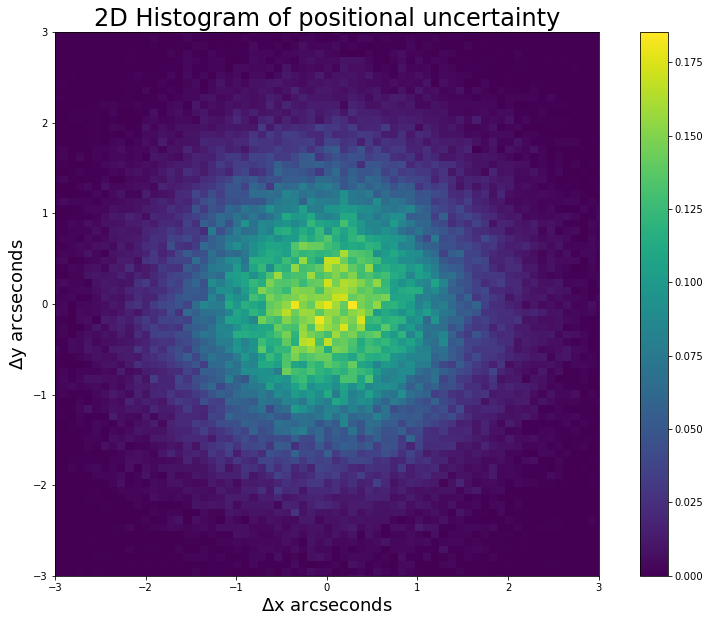

In [49]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

Plotting the x and y distributions individually:

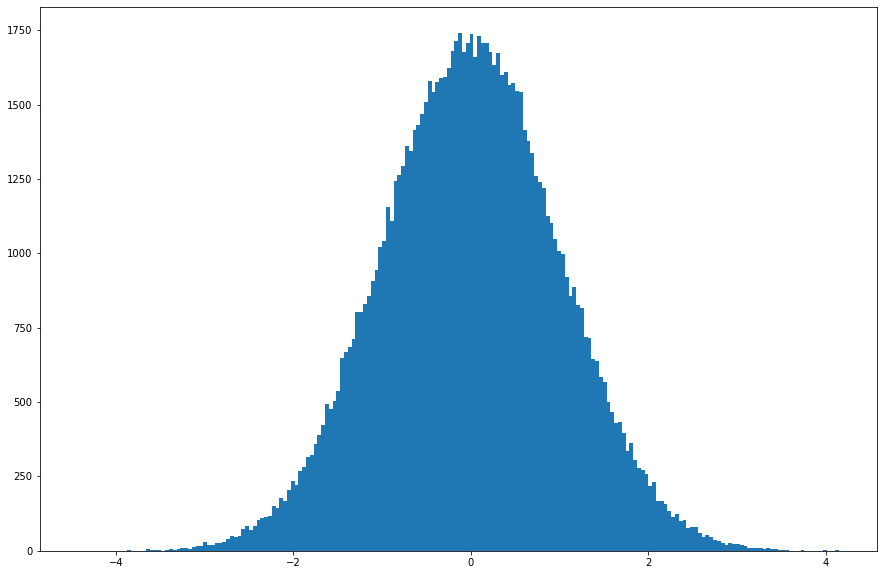

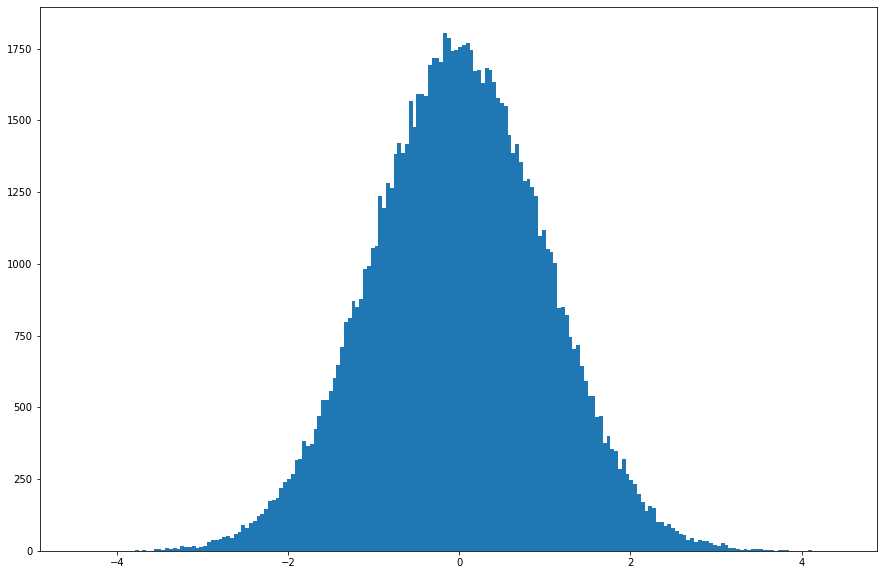

In [50]:
fig, ax1 = plt.subplots(1, 1)
x = stats.norm.rvs( scale = 1, size = 100000)
ax1.hist(x, 200)
fig, ax2 = plt.subplots(1, 1)
y = stats.norm.rvs( scale = 1, size = 100000)
ax2.hist(y, 200)
plt.show()

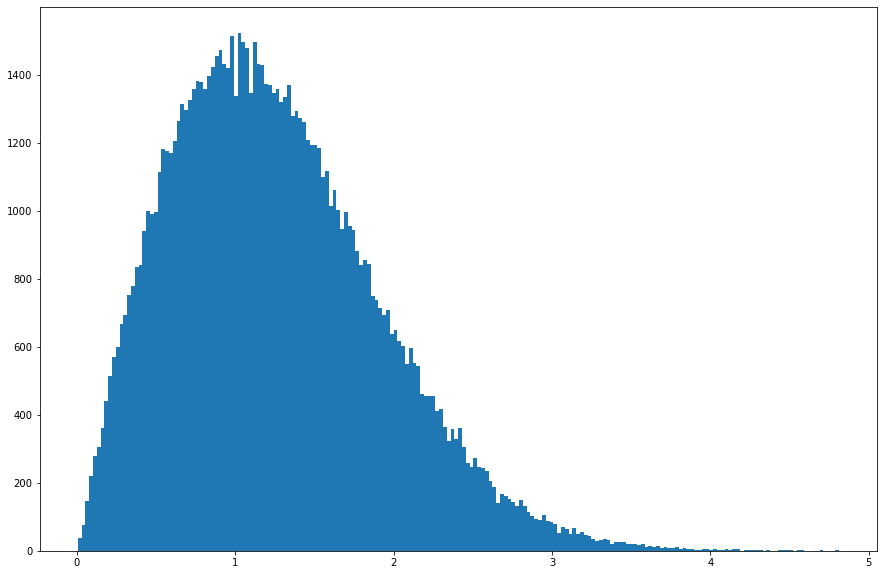

In [51]:
z = (x**2 + y**2)**(1/2)
fig, ax3 = plt.subplots(1, 1)
ax3.hist(z, 200)
plt.show()

We are given the positional uncertainty, but we want to find a distance, which is related to the position by d^2 = x^2 + y^2.

The square of a normal distribution is a chi-square distribution, so x^2 and y^2 would follow chi-square distributions. The sum of x^2 and y^2 is a chi-square distribution with degrees of freedom equal to the sum of the degrees of freedom of x^2 and y^2.

## Problem 3

Question in words: What is the probability of measuring 6800 cosmic rays over a 15 day period.

Question in math: The background distribution is a poisson with an expected value of 1 cosmic ray per minute. Over an 8 hour period, this is the same as a poisson distribution with an expected value of 480 cosmic rays. In order to get the probability of finding 6800 over 15 days, we must sum the poisson with $\mu$ = 480 over 15 days, then integrate from 0 to 6800 to get the probability.

We can observe the moon for 8 hours each night, and we have an expectation value of 1 cosmic ray per minute. Over the course of 8 hours, the expectation value becomes 480 cosmic rays for 8 hours. Plotting the Poisson distribution for a single night:

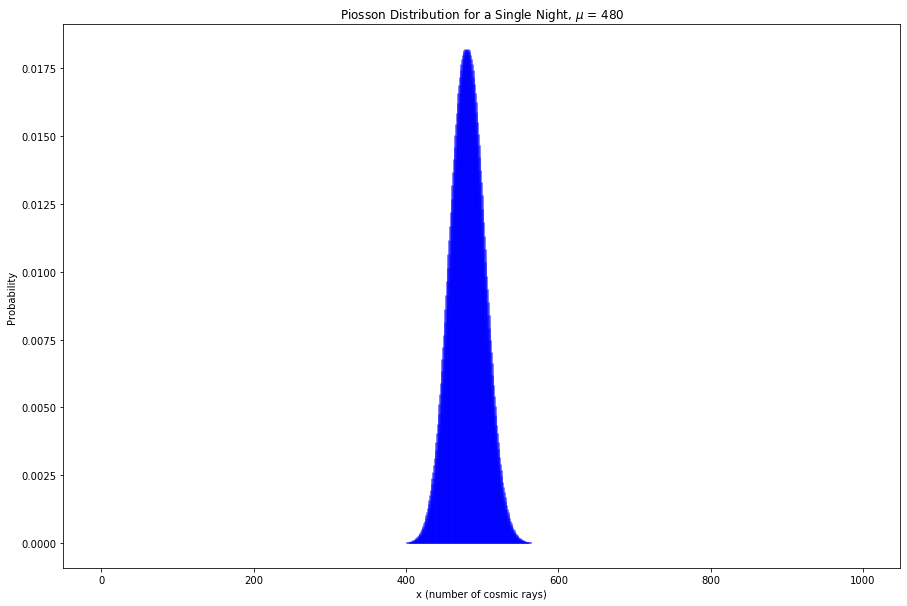

In [75]:
mu = 480
x = np.arange(0,1000)
y = stats.poisson.pmf(x, mu)
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution for a Single Night, $\mu$ = 480')
plt.xlabel('x (number of cosmic rays)')
plt.ylabel('Probability')
plt.show()

Now, we want to sum over 15 days:

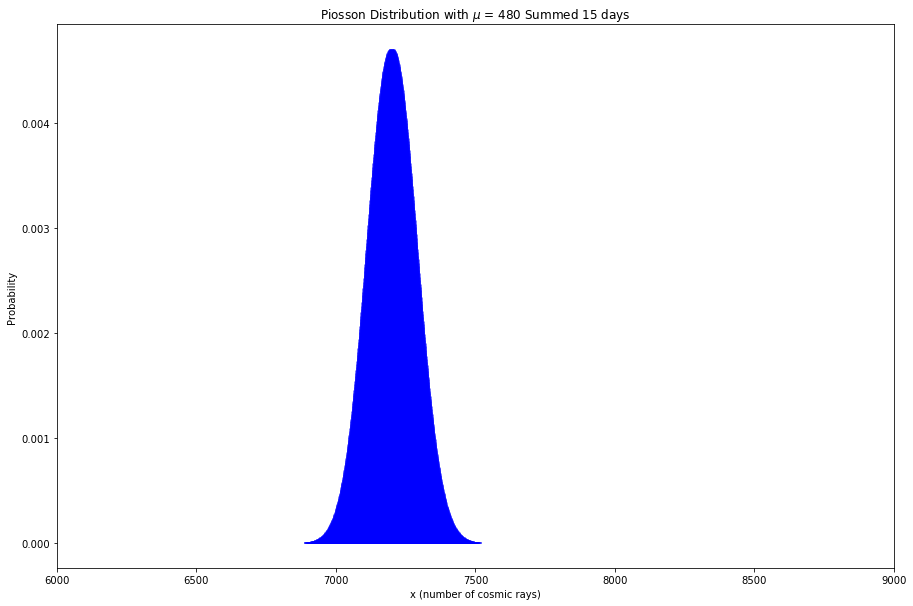

In [78]:
r = y
for i in range(14):
    r = signal.fftconvolve(r, y)
plt.vlines(np.arange(len(r)), 0, r, colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution with $\mu$ = 480 Summed 15 days')
plt.xlabel('x (number of cosmic rays)')
plt.ylabel('Probability')
plt.xlim(6000, 9000)
plt.show()

We would expect this to be the same as a Poisson distribution with a mean value of 480 * 15 = 7200. Plotting the Poisson distribution with $\mu$ = 7200, we can see that they are the same:

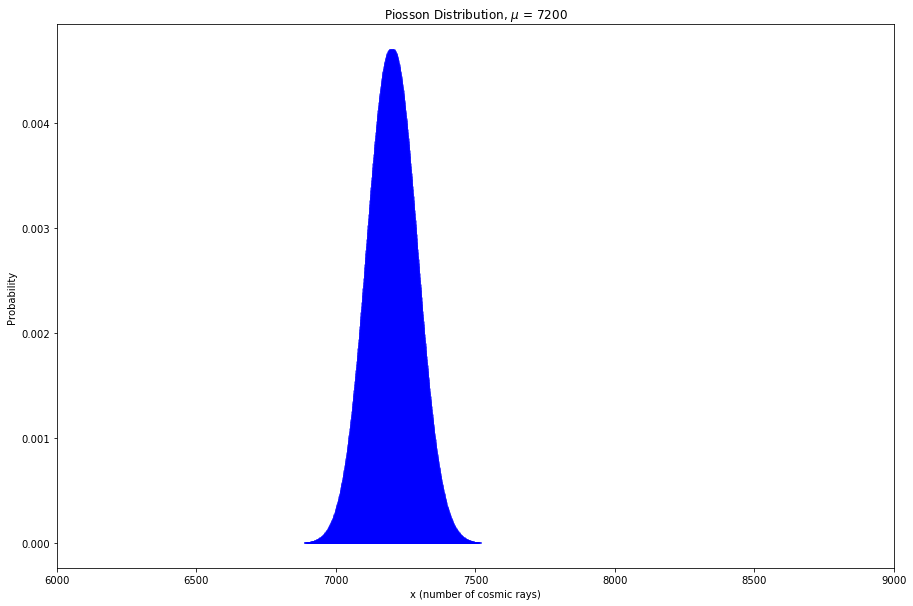

In [79]:
mu = 7200
x = np.arange(len(r))
y = stats.poisson.pmf(x, mu)
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution, $\mu$ = 7200')
plt.xlabel('x (number of cosmic rays)')
plt.ylabel('Probability')
plt.xlim(6000, 9000)
plt.show()

So our background pdf is a Poisson distribution with $\mu$ = 7200. We can integrate that from 0 to 6800 to find the significance of our measurement.

In [80]:
prob = stats.poisson.cdf(6800, 7200)
print('Probability = ' + str(prob))
sigma = stats.norm.ppf(prob)
print('Sigma = ' + str(sigma))

Probability = 1.0133280183917768e-06
Sigma = -4.750747965777188


So the significance of our moon shadow detection is 4.7507$\sigma$, the minus sign indicating that the value lies to the left of the mean.

Although this measurement seems fairly sifnificant, it is not significant enough to be labeled a discovery, as it is less than 5$\sigma$.